## __GroupBy__

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


__Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

In [4]:
cars.groupby('origin').mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

__Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). 

In [5]:
cars.groupby('model_year').mpg.mean()

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

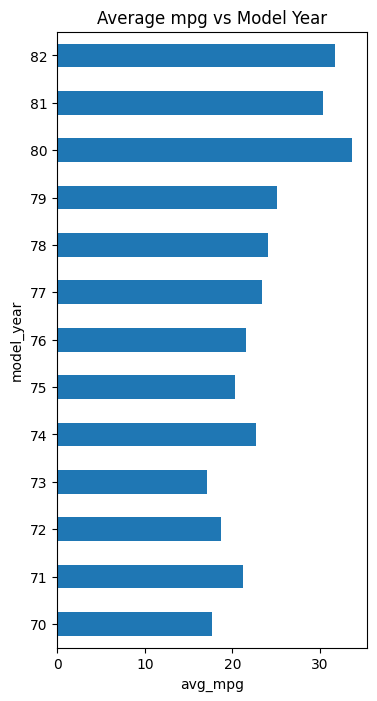

In [32]:
cars.groupby('model_year').mpg.mean().plot(kind = 'barh', figsize = (4,8), fontsize = 10)
plt.title('Average mpg vs Model Year')
plt.ylabel('model_year')
plt.xlabel('avg_mpg')
plt.show()

__Calculate__ the mean/average mpg for each __combination of model_year & origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
Can you see the __same trend__ for all three orgins?

In [18]:
df_year_origin = cars.groupby(['model_year', 'origin']).mpg.mean().unstack()
df_year_origin

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


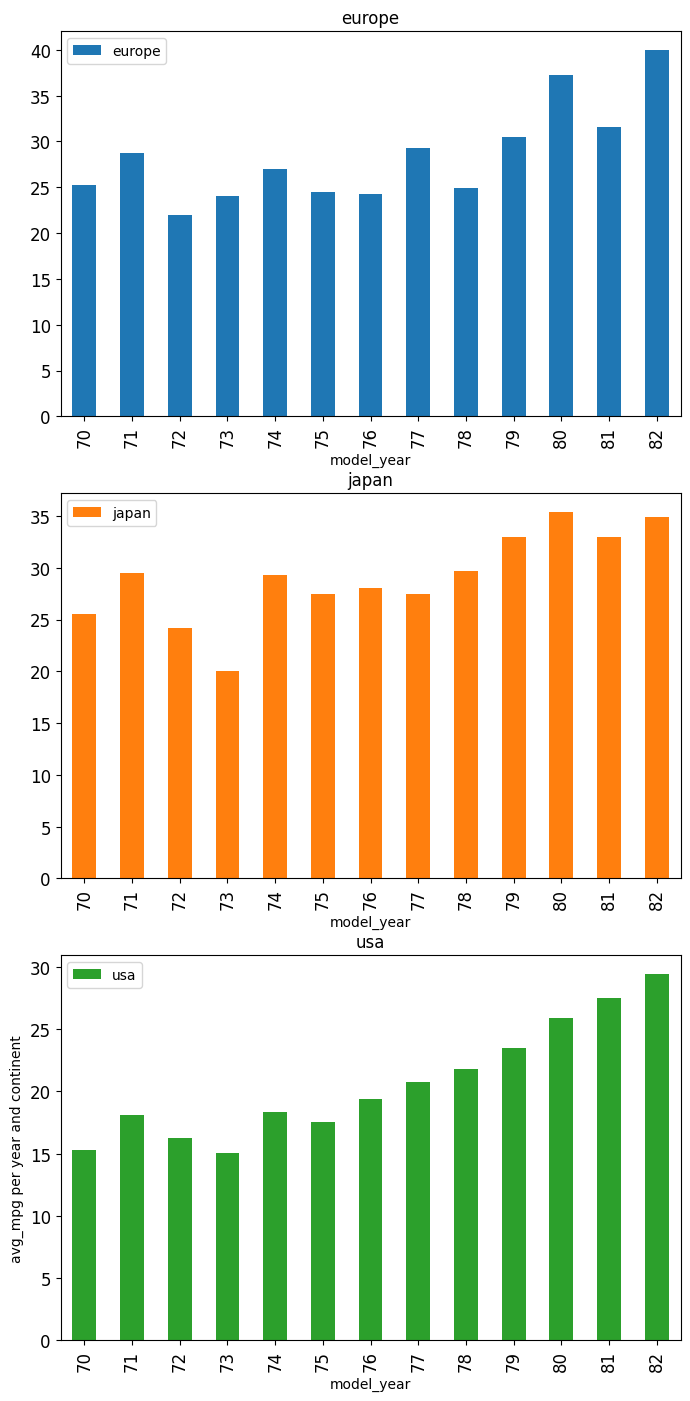

In [38]:
df_year_origin.plot(kind = 'bar', subplots = True, sharex = False, figsize = (8,17), fontsize = 12)
plt.ylabel('avg_mpg per year and continent')
plt.show()

Calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin!

In [36]:
cars.groupby(['model_year', 'origin']).agg(avg_mpg = ('mpg', 'mean'),
                                           min_mpg = ('mpg', 'min'), 
                                           max_mpg = ('mpg', 'max'))

avg_mpg  min_mpg  max_mpg
model_year origin                             
70         europe  25.200000     24.0     26.0
           japan   25.500000     24.0     27.0
           usa     15.272727      9.0     22.0
71         europe  28.750000     27.0     30.0
           japan   29.500000     25.0     35.0
           usa     18.100000     12.0     28.0
72         europe  22.000000     18.0     26.0
           japan   24.200000     19.0     28.0
           usa     16.277778     11.0     28.0
73         europe  24.000000     19.0     29.0
           japan   20.000000     18.0     22.0
           usa     15.034483     11.0     23.0
74         europe  27.000000     24.0     31.0
           japan   29.333333     24.0     32.0
           usa     18.333333     13.0     28.0
75         europe  24.500000     22.0     29.0
           japan   27.500000     24.0     33.0
           usa     17.550000     13.0     23.0
76         europe  24.250000     16.5     29.5
           japan   28.000000     19.0     33.0
           usa     19.431818     13.0     29.0
77         europe  29.250000     21.5     36.0
           japan   27.416667     21.5     33.5
           usa     20.722222     15.0     33.5
78         europe  24.950000     16.2     43.1
           japan   29.687500     21.1     39.4
           usa     21.772727     17.5     36.1
79         europe  30.450000     25.4     37.3
           japan   32.950000     31.8     34.1
           usa     23.478261     15.5     35.7
80         europe  37.288889     29.8     44.3
           japan   35.400000     23.7     46.6
           usa     25.914286     19.1     32.1
81         europe  31.575000     28.1     34.5
           japan   32.958333     24.2     39.1
           usa     27.530769     17.6     39.0
82         europe  40.000000     36.0     44.0
           japan   34.888889     31.0     38.0
           usa     29.450000     22.0     38.0

Return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__!

In [59]:
def  two_most_fuel_efficient_cars(group):
    return group.nlargest(2, 'mpg').loc[:, ["name", "mpg"]]
 
df_the_most_fuel_eff_cars = cars.groupby(['model_year', 'origin']).apply(two_most_fuel_efficient_cars)
df_the_most_fuel_eff_cars.head(20)

name   mpg
model_year origin                                    
70         europe 19       vw 1131 deluxe sedan  26.0
                  23                   bmw 2002  26.0
           japan  18               datsun pl510  27.0
                  14      toyota corona mark ii  24.0
           usa    15            plymouth duster  22.0
                  17              ford maverick  21.0
71         europe 51                peugeot 304  30.0
                  52                  fiat 124b  30.0
           japan  54                datsun 1200  35.0
                  53        toyota corolla 1200  31.0
           usa    30        chevrolet vega 2300  28.0
                  56           plymouth cricket  26.0
72         europe 79            renault 12 (sw)  26.0
                  59                  vw type 3  23.0
           japan  81            datsun 510 (sw)  28.0
                  84   toyota corolla 1600 (sw)  27.0
           usa    83            dodge colt (sw)  28.0
                  58         dodge colt hardtop  25.0
73         europe 117                  fiat 128  29.0
                  102           vw super beetle  26.0

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

In [54]:
cars['mean_mpg'] = cars.groupby(['model_year', 'origin']).mpg.transform('mean')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mean_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727


In [55]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mean_mpg
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.45
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,40.00
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,29.45
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,29.45
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevrolet s-10,29.45


In [57]:
diff = abs(cars.mpg - cars.mean_mpg) > 10
diff

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [58]:
cars.loc[diff]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mean_mpg
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000
